### Задача кластеризации

#### Примеры:
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#### В Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  

Параметры:
- n_clusters – количество кластеров. 
- init – способ инициализации центроидов (по умолчанию ‘k-means++’).
- n_init – количество запусков алгоритма со случайной инициализацией центроидов (по умолчанию n_init = 10).
- random_state – определяет случайность инициализации центроида.


Атрибуты:
- cluster_centers_ – координаты центров кластеров.
- labels_ – возвращает метки кластеров.
- inertia_ – сумма квадратов расстояний наблюдений до ближайшего центра кластера.

#### Прочитайте материал
https://www.dmitrymakarov.ru/intro/clustering-16/

### Задание
В файле mobile.xlsx находятся данные об абонентах телекоммуникационной
компании.  
Целью исследования является сегментация абонентской базы для разработки
новых тарифов и проведения маркетинговых акций.

In [1]:
import pandas as pd
df = pd.read_excel('mobile.xlsx')
df

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,56,82,121.54
1,1,221,287.51
2,36,68,113.70
3,23,96,410.23
4,29,139,537.60
...,...,...,...
4487,30,66,186.20
4488,23,112,500.68
4489,5,189,470.42
4490,69,124,858.99


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Количество SMS за месяц  4492 non-null   int64  
 1   Количество звонков       4492 non-null   int64  
 2   Среднемесячный расход    4492 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 105.4 KB


In [3]:
df.describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
count,4492.000000,4492.000000,4492.000000
mean,21.243321,140.480632,506.155512
std,27.911864,91.742992,646.252023
min,0.000000,2.000000,3.180000
25%,3.000000,94.000000,152.880000
50%,6.000000,129.000000,316.960000
75%,32.000000,168.000000,600.032500
max,179.000000,635.000000,5142.760000


In [4]:
# подключим функции для реализации алгоритмов кластеризации
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
# подключим метрики ARI и "силуэт"
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [5]:
# как и в случае классификации, выполним нормализацию данных
# однако делить данные на обучающую и тестовую выборку не будем -
# в задаче кластеризации это не требуется. Есть просто набор данных
# (в нашем случае размеченных - мы знаем истинное разбиение на кластеры),
# нужно отнести каждый объект набора к тому или иному кластеру

#from sklearn.preprocessing import MinMaxScaler  # минимаксная нормализация

In [56]:
# Нормализация данных
# КОД
df_s = (df - df.min())/(df.max() - df.min())
df_s

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
0,0.312849,0.126382,0.023029,0.0
1,0.005587,0.345972,0.055322,1.0
2,0.201117,0.104265,0.021504,1.0
3,0.128492,0.148499,0.079199,1.0
4,0.162011,0.216430,0.103981,1.0
...,...,...,...,...
4487,0.167598,0.101106,0.035610,1.0
4488,0.128492,0.173776,0.096798,1.0
4489,0.027933,0.295419,0.090910,1.0
4490,0.385475,0.192733,0.166514,0.0


In [57]:
# подключим функции для реализации алгоритмов кластеризации
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
# подключим метрики ARI и "силуэт"
from sklearn.metrics import adjusted_rand_score, silhouette_score

### 1. Метод k-means

In [58]:
# Импортируем k-means из библиотеки Scikit-learn
from sklearn.cluster import KMeans

# Создаем экземпляр класса k-means
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)

# Обучаем агоритм на данных с помощью метода fit
kmeans.fit(df_s)

# Записываем номера кластеров в новый столбец
df['Кластер'] = kmeans.labels_
df.head()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
0,56,82,121.54,1
1,1,221,287.51,2
2,36,68,113.70,2
3,23,96,410.23,2
4,29,139,537.60,2


#### Метод локтя

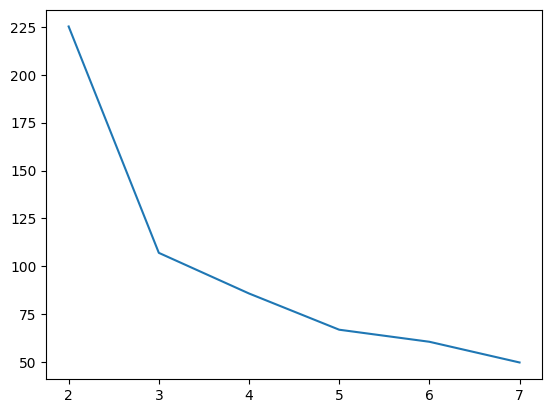

In [59]:
# Создадим список, в который будем записывать значение критерия качества k-means
criterion = []
# Количество кластеров будем изменять от 2 до 7
for k in range(2,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_s)
    criterion.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,8), criterion)

#### Визуализация кластеров

In [60]:
# для визуализации в двумерном пространстве из нескольких признаков сконструируем два,
# используя метод главных компонент
from sklearn.decomposition import PCA

# выполняем конструирование признаков, поместим полученные значения
# в отдельные столбцы PC1, PC2

In [61]:
[PC1, PC2] = PCA(2).fit_transform(df_s).T

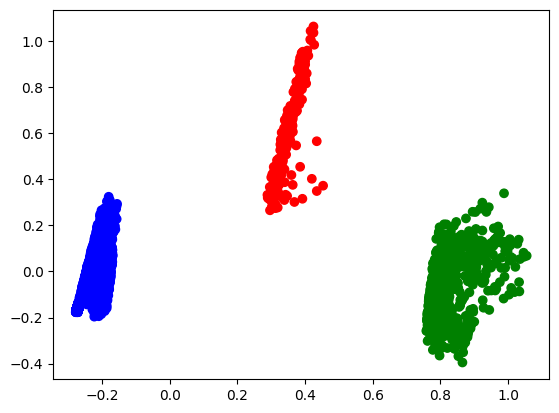

In [62]:
color = {0: 'r', 1: 'g', 2: 'b'}
plt.scatter(PC1, PC2, color=df['Кластер'].apply(lambda a: color[a]))

#### Оценка качества кластеризации

In [69]:
# КОД
from sklearn.metrics import silhouette_score as s_score
from sklearn.metrics import adjusted_rand_score as ars
s_score(df_s, kmeans.predict(df_s))
for col in df.columns[:]:
    print(f'ARS - {col}: ', ars(df[col], kmeans.labels_))

ARS - Количество SMS за месяц:  0.12244075777022138
ARS - Количество звонков:  0.010266321485265946
ARS - Среднемесячный расход:  0.00029311849855416245
ARS - Кластер:  0.312968244020193


C:\Users\Laptop8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


### 2. Алгоритм DBSCAN

In [64]:
# сколько всего кластеров выделил DBSCAN?

In [70]:
dbsca = DBSCAN(min_samples=5)
dbsca.fit_predict(df_s[:-1])

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

#### Оценка качества кластеризации

In [74]:
#s_score(df_s, dbsca.fit_predict(df_s))
for col in df.columns[:]:
    print(f'ARS - {col}: ', ars(df[col][:-1], dbsca.labels_))

ARS - Количество SMS за месяц:  0.045939809055158015
ARS - Количество звонков:  0.0020358136983988444
ARS - Среднемесячный расход:  6.530529069461199e-05
ARS - Кластер:  1.0


C:\Users\Laptop8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


### 3. Иерархический агломеративный метод

In [86]:
aggcl = AgglomerativeClustering(n_clusters=5)
aggcl.fit_predict(df)

array([3, 1, 3, ..., 1, 0, 3], dtype=int64)

In [89]:
print(s_score(df, aggcl.fit_predict(df)))
for col in df.columns[:]:
    print(f'ARS - {col}: ', ars(df[col][:-1], dbsca.labels_))

0.48317264487129535
ARS - Количество SMS за месяц:  0.045939809055158015
ARS - Количество звонков:  0.0020358136983988444
ARS - Среднемесячный расход:  6.530529069461199e-05
ARS - Кластер:  1.0


C:\Users\Laptop8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
